In [3]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
time_series = pd.read_csv("C:/Users/fremo/Data Science/Final Project/NFTdata/NFT_Time_Series.csv")
time_series.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
time_series.head()

,ds,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,y,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,2017-06-22,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-23,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,2017-06-24,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,2017-06-25,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,2017-06-26,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


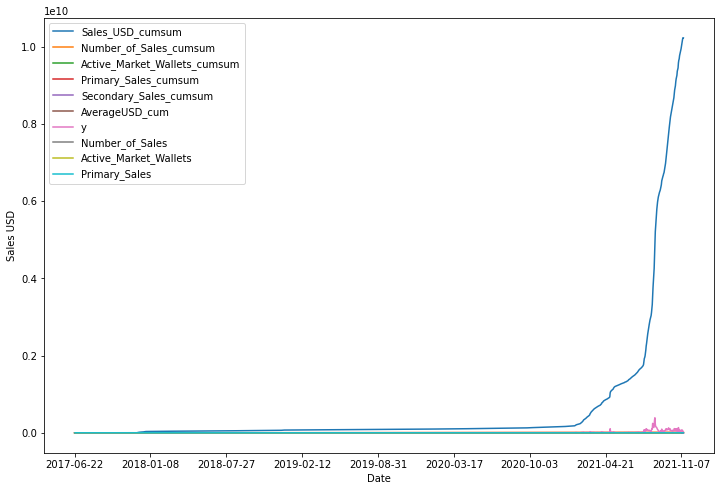

In [5]:
ax = time_series.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

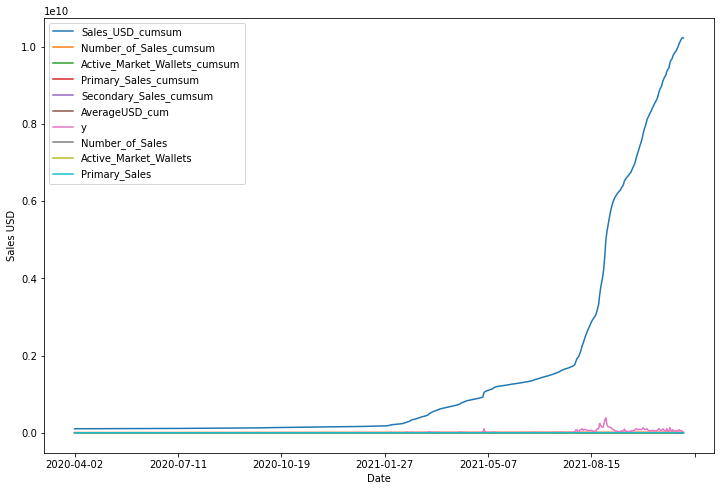

In [6]:
pre_covid = time_series.iloc[:1016,:]
post_covid = time_series.iloc[1016:,:]

post_covid_clean = post_covid[['ds', 'y']]

ax = post_covid.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Sales USD')
ax.set_xlabel('Date')

plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates

C:\Users\fremo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


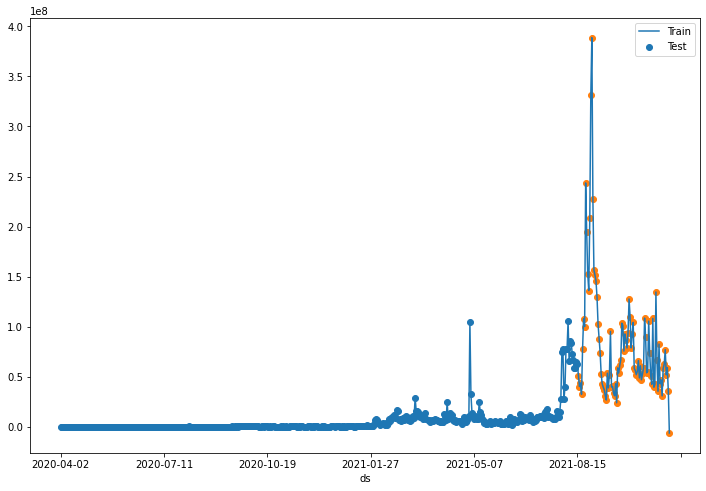

In [8]:
attrs = post_covid.ds
labels = post_covid.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.15, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = post_covid_clean.set_index('ds').plot(figsize=(12, 8))
plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

I fixed the x - axis disaster!!

In [9]:
model = Prophet(interval_width=0.95)
model.fit(train_data)

#future = model.make_future_dataframe(periods=3, freq='MS')
future = model.make_future_dataframe(periods = 98)

forecast = model.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast.tail()

21:39:29 - cmdstanpy - INFO - Chain [1] start processing
21:39:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
594,2021-11-17,5.187976e+07,3.126503e+07,7.190055e+07
595,2021-11-18,5.213697e+07,3.253927e+07,7.244396e+07
596,2021-11-19,5.272871e+07,3.284116e+07,7.301676e+07
597,2021-11-20,5.295126e+07,3.201113e+07,7.376143e+07
598,2021-11-21,5.380591e+07,3.266910e+07,7.453288e+07


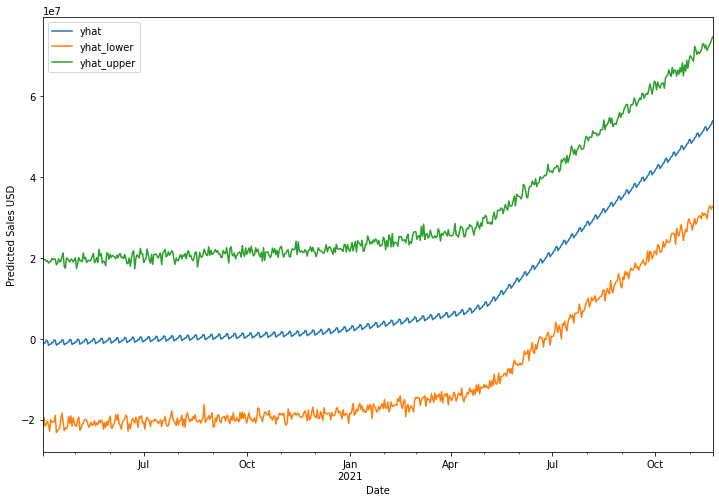

In [10]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

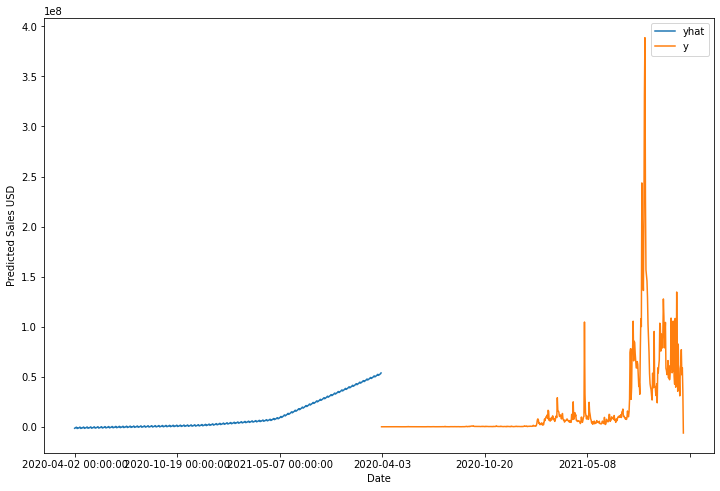

In [11]:
forecast = forecast[['ds', 'yhat']]
dfs = [forecast, post_covid_clean]
compare = pd.concat(dfs)

ax = compare.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

__________________________________________________________________________________________________________________________


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [13]:
forecast.ds = pd.to_datetime(forecast.ds)
post_covid_clean.ds = pd.to_datetime(post_covid_clean.ds)

C:\Users\fremo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
newGraph = pd.merge_asof(post_covid_clean,forecast)

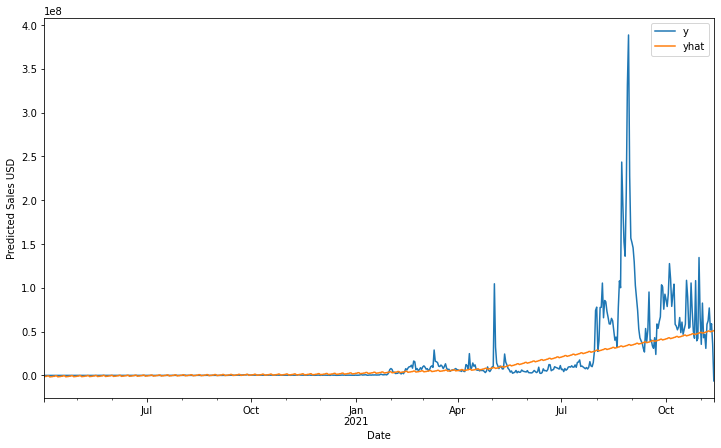

In [15]:
ax = newGraph.set_index('ds').plot(figsize=(12, 7))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

In [22]:
testNewGraph = newGraph
testNewGraph = testNewGraph.iloc[1:, :]
testNewGraph

,ds,y,yhat
1,2020-04-03,5.928849e+04,-1.052382e+06
2,2020-04-04,7.674809e+04,-1.042219e+06
3,2020-04-05,5.540351e+04,-3.999507e+05
4,2020-04-06,4.266648e+04,-5.009675e+05
5,2020-04-07,4.882103e+04,-1.681205e+06
...,...,...,...
585,2021-11-08,7.706698e+07,5.080206e+07
586,2021-11-09,5.197508e+07,4.983421e+07
587,2021-11-10,5.901034e+07,5.032215e+07
588,2021-11-11,3.554317e+07,5.057937e+07


In [23]:
mean_absolute_error(testNewGraph.y, testNewGraph.yhat)

10718247.346847901

In [24]:
mean_squared_error(testNewGraph.y, testNewGraph.yhat)

973046392672138.0

In [25]:
mean_squared_error(testNewGraph.y, testNewGraph.yhat, squared=False)

31193691.552494038

Ok so this graph is comparing the predicted (blue) values with the actual (orange values). Obviously we need to reformat the date/timestamp of the predicted values which I spent like an hour trying to do to no avail. It's now a next week problem. 

We are having some trouble deciding on the best way to split the time series data because the trend is pretty much no nfts --> covid --> some nfts --> a shit ton of nfts. Except, obviously, profit can't predict covid. And because covid wasn't too long ago and the actual values are so erratic, its difficult to make a prediction.

[]

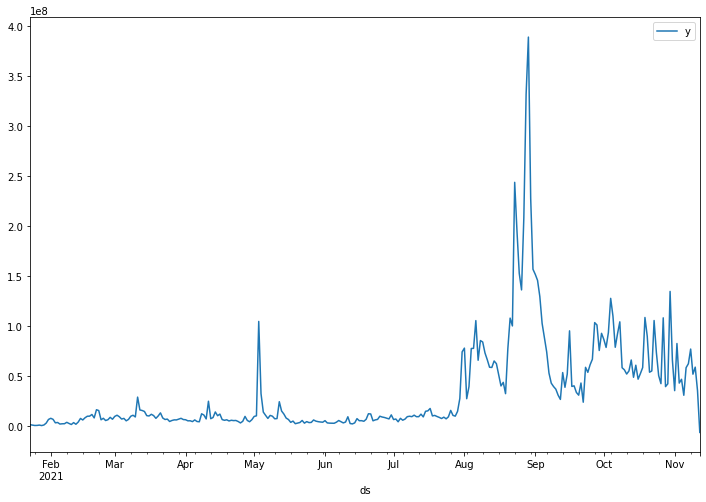

In [26]:
#Now lets predict the actual future!

nft_spike = post_covid_clean.iloc[296:,:]
nft_spike.head()

ax = nft_spike.set_index('ds').plot(figsize=(12, 8))

plt.plot()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

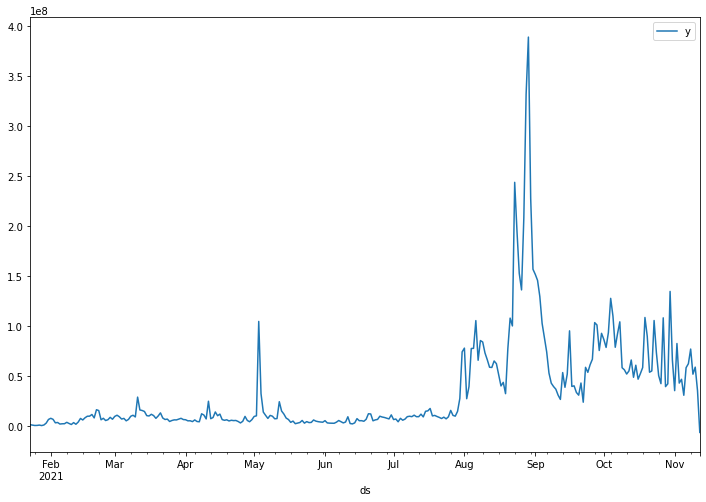

In [27]:
attrs = nft_spike.ds
labels = nft_spike.y

f_train, f_test, l_train, l_test = train_test_split(attrs, labels, test_size=0.33, shuffle=False)

train_data = pd.concat([f_train, l_train], axis=1)
test_data = pd.concat([f_test, l_test], axis=1)

ax = nft_spike.set_index('ds').plot(figsize=(12, 8))

plt.scatter(f_train, l_train)
plt.scatter(f_test, l_test)
plt.legend(["Train", "Test"])

21:59:07 - cmdstanpy - INFO - Chain [1] start processing
21:59:07 - cmdstanpy - INFO - Chain [1] done processing


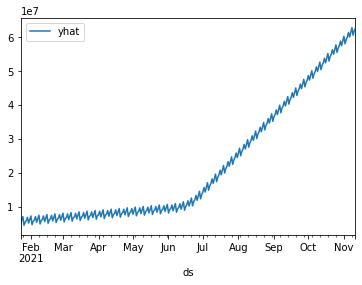

In [28]:
model_3_mo = Prophet(interval_width=0.95)
model_3_mo.fit(train_data)

#future_3_mo = model_3_mo.make_future_dataframe(periods=3, freq='MS')
future_3_mo = model_3_mo.make_future_dataframe(periods = 97)

forecast_3_mo = model_3_mo.predict(future_3_mo)
forecast_3_mo = forecast_3_mo[['ds', 'yhat']]

forecast_3_mo = forecast_3_mo[['ds', 'yhat']]
#dfs_3_mo = [forecast_3_mo, nft_spike]
#comp = pd.concat(dfs)

#ax = comp.set_index('ds').plot(figsize=(12, 8))
#ax.set_ylabel('Predicted Sales USD')
#ax.set_xlabel('Date')
ax = forecast_3_mo.set_index('ds').plot()
plt.show()

Next steps: We need to get the actual and the predicted on the same plot correctly so that we can calculate error! Then I think we're pretty much done.

Calculate regression, root mean sqaure errore, mean absloutle error, 

sklearn --> mean absloute error

Write some conclsuions abotu data, why we split where we did, what did we learn etc. 

How does prophet work, with seasons, how it preditcs why does it fail. 

In [29]:
forecast_3_mo.ds = pd.to_datetime( forecast_3_mo.ds)
nft_spike.ds = pd.to_datetime(nft_spike.ds)

C:\Users\fremo\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
spike = pd.merge_asof(nft_spike,forecast_3_mo)

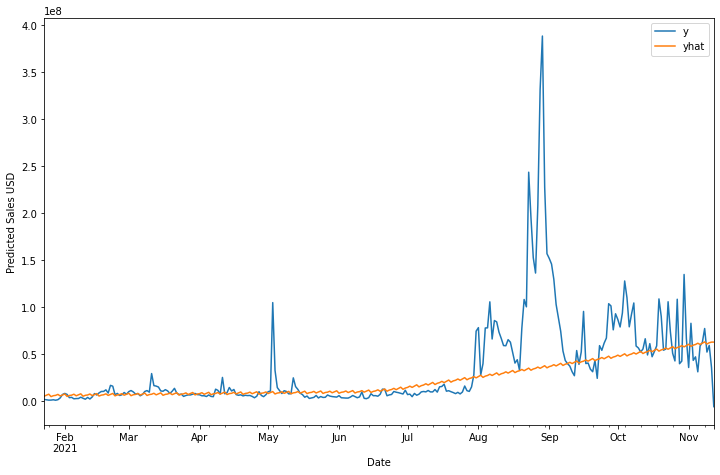

In [35]:
ax = spike.set_index('ds').plot(figsize=(12, 7.5))
ax.set_ylabel('Predicted Sales USD')
ax.set_xlabel('Date')

plt.show()

In [32]:
mean_absolute_error(spike.y, spike.yhat)

18663528.05255009

In [33]:
mean_squared_error(spike.y, spike.yhat)

1866087643185762.8

In [34]:
mean_squared_error(spike.y, spike.yhat, squared=False)

43198236.5749548